In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
from skimage.io import imread
import os
from glob import glob
# not needed in Kaggle, but required in Jupyter
%matplotlib inline 

import cv2
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

In [ ]:
from keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import add
from tensorflow.keras.layers import AveragePooling2D
import sklearn.metrics as metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



In [ ]:
import os
os.chdir(r'/content/drive/MyDrive/GAN')
df = pd.read_csv('/content/drive/MyDrive/GAN/data_dresses.csv',sep=';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()


,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit,occasion
0,05.803.82.8357_595932,dresses/05.803.82.8357_595932.jpg,"Normaler Träger, Rundhals-Ausschnitt, Taillier...",s.Oliver RED LABEL,dresses,black,https://cdn.aboutstatic.com/file/d34a04c09625b...,https://cdn.aboutstatic.com/file/be94104d68a1b...,Kleid,https://www.aboutyou.de/p/s-oliver-red-label/k...,short,knee,round,unicolors,tight,NaN
1,05.807.82.6853_46B132,dresses/05.807.82.6853_46B132.jpg,"Abgesteppter Saum/Kante, Ausgestellter Schnitt...",s.Oliver RED LABEL,dresses,pink,https://cdn.aboutstatic.com/file/8e2503d650365...,https://cdn.aboutstatic.com/file/89d75c9971649...,Kleid,https://www.aboutyou.de/p/s-oliver-red-label/k...,sleeveless,short,back,floral,tight,NaN
2,05.807.82.7936_59G332,dresses/05.807.82.7936_59G332.jpg,"Abgesteppter Saum/Kante, Ausgestellter Schnitt...",s.Oliver RED LABEL,dresses,blue,https://cdn.aboutstatic.com/file/cc792eac6cfd9...,https://cdn.aboutstatic.com/file/42b431d51042c...,Kleid,https://www.aboutyou.de/p/s-oliver-red-label/k...,short,short,deep,stripes,tight,NaN
3,100174,dresses/100174.jpg,"Damenkleid von Daniel Hechter, Leichtes Materi...",Daniel Hechter,dresses,black,https://img.fidcdn.net/r17/product/daniel-hech...,https://img.fidcdn.net/r17/product/daniel-hech...,Kleid mit Rundhalsausschnitt und kurzem Schlitz,https://www.fashionid.de/daniel-hechter/damen-...,NaN,NaN,NaN,NaN,loose,NaN
4,1001751002,dresses/1001751002.jpg,"Rundhals-Ausschnitt, Abgesteppter Saum/Kante, ...",TOM TAILOR DENIM,dresses,blue,https://cdn.aboutstatic.com/file/486c43af4548d...,https://cdn.aboutstatic.com/file/d22b4007739a0...,Kleid,https://www.aboutyou.de/p/tom-tailor-denim/kle...,long,3-4,round,NaN,normal,NaN


In [ ]:
df.sample(frac=1)

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,sleeve_length,length,neckline,pattern,fit,occasion
14211,V1021C0VX-Q11,dresses/V1021C0VX-Q11.jpg,"Material & Pflegehinweise, Material Oberstoff:...",Vila,dresses,black,https://mosaic03.ztat.net/vgs/media/packshot/p...,https://mosaic03.ztat.net/vgs/media/pdp-zoom/V...,VIRIL DRESS - Strickkleid,NaN,long,knee,round,unicolors,normal,NaN
13648,SU221C0B6-C11,dresses/SU221C0B6-C11.jpg,"Material & Pflegehinweise, Material Oberstoff:...",Superdry,dresses,gray,https://mosaic03.ztat.net/vgs/media/packshot/p...,https://mosaic03.ztat.net/vgs/media/pdp-zoom/S...,ALEXIA SWEATKLEID - Freizeitkleid,NaN,long,short,round,print,normal,casual
2068,5713781087171,dresses/5713781087171.jpg,"Rundhals-Ausschnitt, Viskose, Abgesteppter Sau...",VILA,dresses,white,https://cdn.aboutstatic.com/file/5c6541d189a35...,https://cdn.aboutstatic.com/file/b5be7f8f7f8c0...,Kleid,https://www.aboutyou.de/p/vila/kleid-3897511,short,short,round,floral,tight,NaN
14285,VA221C00U-Q11,dresses/VA221C00U-Q11.jpg,"Material & Pflegehinweise, Material Oberstoff:...",Vans,dresses,black,https://mosaic04.ztat.net/vgs/media/packshot/p...,https://mosaic03.ztat.net/vgs/media/pdp-zoom/V...,LEGEND STAMP DRESS - Jerseykleid,NaN,sleeveless,3-4,round,print,tight,NaN
8500,EX121C06P-N11,dresses/EX121C06P-N11.jpg,"Material & Pflegehinweise, Material Oberstoff:...",Expresso,dresses,green,https://mosaic03.ztat.net/vgs/media/packshot/p...,https://mosaic03.ztat.net/vgs/media/pdp-zoom/E...,GROVE - Maxikleid,NaN,short,long,round,stripes,tight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9583,JR421C0FK-Q11,dresses/JR421C0FK-Q11.jpg,"Material & Pflegehinweise, Material Oberstoff:...",Junarose,dresses,black,https://mosaic02.ztat.net/vgs/media/packshot/p...,https://mosaic01.ztat.net/vgs/media/pdp-zoom/J...,Jerseykleid,NaN,half,knee,v,stripes,normal,NaN
6005,A0Q21C04V-Q11,dresses/A0Q21C04V-Q11.jpg,"Material & Pflegehinweise, Material Oberstoff:...",AllSaints,dresses,black,https://mosaic02.ztat.net/vgs/media/packshot/p...,https://mosaic01.ztat.net/vgs/media/pdp-zoom/A...,MARLOW - Freizeitkleid,NaN,half,short,NaN,unicolors,normal,casual
11658,NL021C0SV-Q11,dresses/NL021C0SV-Q11.jpg,"Material & Pflegehinweise, Material Oberstoff:...",New Look,dresses,black,https://mosaic03.ztat.net/vgs/media/packshot/p...,https://mosaic03.ztat.net/vgs/media/pdp-zoom/N...,RIVERPOOL STRAPPY MIDI - Etuikleid,NaN,sleeveless,short,v,unicolors,tight,NaN
10523,M1B21C01D-Q11,dresses/M1B21C01D-Q11.jpg,"Material & Pflegehinweise, Material Oberstoff:...",My Mascara Curves,dresses,black,https://mosaic01.ztat.net/vgs/media/packshot/p...,https://mosaic01.ztat.net/vgs/media/pdp-zoom/M...,SWEETHEART - Ballkleid,NaN,sleeveless,long,v,NaN,tight,party


In [ ]:
df.groupby(df['sleeve_length']).count()

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,length,neckline,pattern,fit,occasion
sleeve_length,,,,,,,,,,,,,,,
half,2796,2796,2796,2796,2796,2796,2796,2792,2796,1469,2466,2268,2389,2762,798
long,2548,2548,2548,2548,2548,2548,2548,2541,2548,1456,2360,1672,2214,2523,609
short,3026,3026,3026,3026,3026,3026,3026,3018,3026,1557,2740,2461,2602,2990,918
sleeveless,4959,4959,4959,4959,4959,4959,4959,4946,4959,3210,3967,3893,4024,4565,1477


In [ ]:
df[df['sleeve_length']== np.nan].shape

(0, 16)

In [ ]:
df['sleeve_length'].unique()

array(['short', 'sleeveless', nan, 'long', 'half'], dtype=object)

In [ ]:
df = df.groupby(df['sleeve_length']).head(2500)

In [ ]:
df = df.dropna(axis=0, subset=['sleeve_length']).sample(frac=1)
df = df.reset_index(drop=True)

In [ ]:
df.groupby(df['sleeve_length']).count()

,id,img_path,attributes,brand,category,color,img_url,model_img_urls,name,product_url,length,neckline,pattern,fit,occasion
sleeve_length,,,,,,,,,,,,,,,
half,2500,2500,2500,2500,2500,2500,2500,2496,2500,1365,2175,2024,2111,2467,688
long,2500,2500,2500,2500,2500,2500,2500,2494,2500,1436,2313,1644,2168,2475,595
short,2500,2500,2500,2500,2500,2500,2500,2498,2500,1364,2218,2014,2110,2466,712
sleeveless,2500,2500,2500,2500,2500,2500,2500,2494,2500,2155,1593,1950,1764,2127,558


In [ ]:
trlen = int(len(df)*0.75)
tslen = len(df)-trlen
print(trlen,tslen)


7500 2500


In [ ]:
#shape = (200,200)  
tsDat = [] 
trDat = []
trlabels = []
tslabels = []
for i in range(int(len(df))):
    if i <trlen:
        img = cv2.imread(df['img_path'][i])
        #img = cv2.resize(img,shape)
        trDat.append(img)
        trlabels.append(df['sleeve_length'][i])
    else:
        img = cv2.imread(df['img_path'][i])
        #img = cv2.resize(img,shape)
        tsDat.append(img)
        tslabels.append(df['sleeve_length'][i])
    
    
trLbl = pd.get_dummies(trlabels).values    
trlabelname = pd.get_dummies(trlabels).columns
tsLbl = pd.get_dummies(tslabels).values    
tslabelname = pd.get_dummies(tslabels).columns


In [ ]:
trDat = np.array(trDat)
tsDat = np.array(tsDat)

In [ ]:
dfc = pd.DataFrame({'key': np.array(tslabels),
                   'data': range(len(tslabels))}, columns=['key', 'data'])
dfc.groupby('key').count()


,data
key,
half,630
long,613
short,624
sleeveless,633


imagenumber =13
print(images[imagenumber].shape)
#
print(labels[imagenumber].shape)
print(labelname[int(np.where(labels[imagenumber]==1)[0])])
RGB_img = cv2.cvtColor(images[imagenumber], cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)


In [ ]:
imgrows         = trDat[0].shape[0]
imgclms         = trDat[0].shape[1]
channel         = trDat[0].shape[2]
num_classes     = len(np.unique(tslabels))

In [ ]:
print(imgrows,imgclms,channel,num_classes)

256 256 3 4


In [ ]:
optmz       = optimizers.RMSprop(lr=0.0001)                                     # Step 1

                                                                                # Step 3
def createModel():
    inputs = Input(shape=(imgrows,imgclms,channel))
    x = Conv2D(32,(3,3),padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    x = Conv2D(32,(3,3),padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Flatten()(x)
    x = Dense(64,activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes,activation='softmax')(x) 
    
    model = Model(inputs=inputs,outputs=x) 

    model.compile(loss='categorical_crossentropy', 
                  optimizer=optmz, 
                  metrics=['accuracy'])


    return model

                                                                                # Step 4
model       = createModel() # This is meant for training
modelGo     = createModel() # This is used for final testing

model.summary()                                                                 # Step 5

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 dropout (Dropout)           (None, 256, 256, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                             

In [ ]:
modelname       = 'sleeve_length_pred_conv_51'                                                                                # Step 1
folderpath      = 'D:\\Intelligent Systems\\Pattern Recognition Systems\\PR-project\\jupytermodel\\'
filepath        = folderpath + modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=8, restore_best_weights=True)
csv_logger      = CSVLogger(folderpath+modelname +'.csv')                       # Step 2
callbacks_list  = [checkpoint,csv_logger,early]                                       # Step 3

print("Callbacks created:")
print(callbacks_list[0])
print(callbacks_list[1])
print('')
print("Path to model:", filepath)
print("Path to log:  ", folderpath+modelname+'.csv')

Callbacks created:

Path to model: D:\Intelligent Systems\Pattern Recognition Systems\PR-project\jupytermodel\sleeve_length_pred_conv_51.hdf5
Path to log:   D:\Intelligent Systems\Pattern Recognition Systems\PR-project\jupytermodel\sleeve_length_pred_conv_51.csv


In [ ]:
history = model.fit(trDat,                    # Training data
          trLbl,                            # Training label
          validation_data=(tsDat, tsLbl),   # Validation data and label
          epochs=5,                       # The amount of epochs to be trained
          batch_size=20,                   
          shuffle=True                     # To shuffle the training data
          ,callbacks=callbacks_list         # Callbacks to execute the checkpoints
         )

Epoch 1/5
375/375 [==============================] - 1858s 5s/step - loss: 2.2929 - accuracy: 0.2391 - val_loss: 1.3866 - val_accuracy: 0.2388
Epoch 2/5
375/375 [==============================] - 1844s 5s/step - loss: 1.5215 - accuracy: 0.2488 - val_loss: 1.3847 - val_accuracy: 0.2428
Epoch 3/5
375/375 [==============================] - 1868s 5s/step - loss: 1.3863 - accuracy: 0.2485 - val_loss: 1.3864 - val_accuracy: 0.2416
Epoch 4/5
375/375 [==============================] - 1883s 5s/step - loss: 1.4042 - accuracy: 0.2517 - val_loss: 1.3856 - val_accuracy: 0.2420
Epoch 5/5
375/375 [==============================] - 1887s 5s/step - loss: 1.4336 - accuracy: 0.2513 - val_loss: 1.3842 - val_accuracy: 0.2428


/bin/bash: pyhon: command not found


In [ ]:
#device = cuda.get_current_device()
#device.reset()



Text(0.5, 1.0, 'Accuracy evolution')

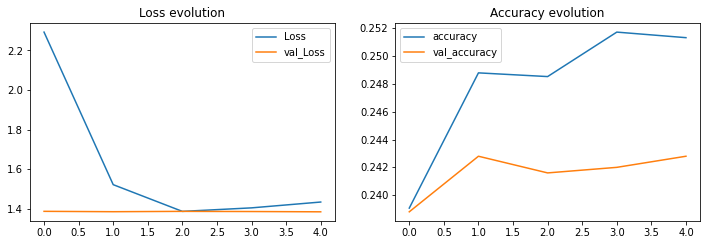

In [ ]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

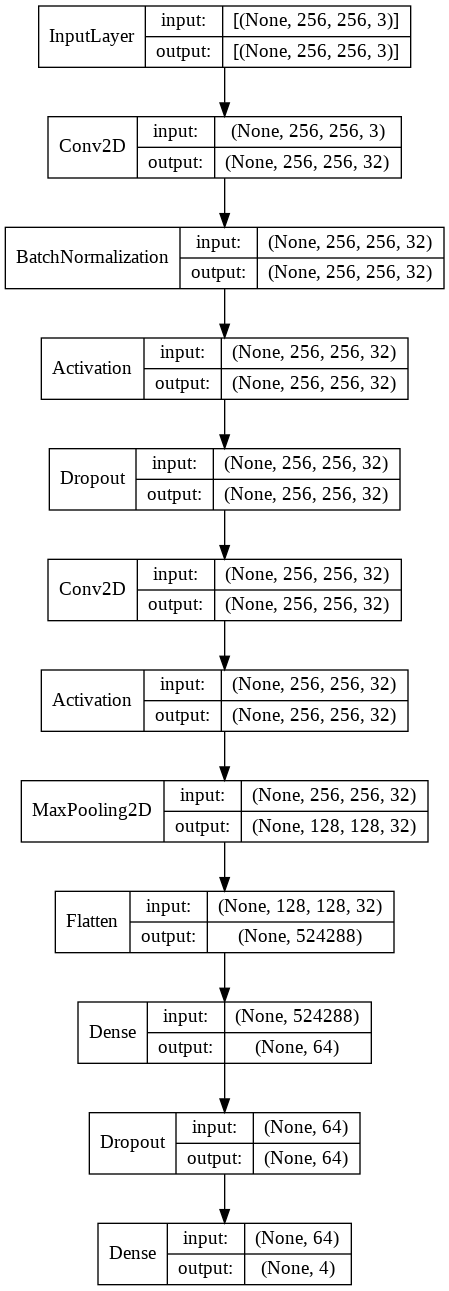

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 
           to_file='CNN_model_sleevelength_5.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB')

In [ ]:
modelGo.load_weights(filepath)
modelGo.compile(loss='categorical_crossentropy', 
                optimizer=optmz, 
                metrics=['accuracy'])

predicts    = modelGo.predict(tsDat)                                            # Step 2
print("Prediction completes.")

79/79 [==============================] - 116s 1s/step
Prediction completes.


In [ ]:
predout     = np.argmax(predicts,axis=1)
testout     = np.argmax(tsLbl,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=tslabelname,
                                    digits=4))

Best accuracy (on testing dataset): 24.28%
              precision    recall  f1-score   support

        half     0.1905    0.0190    0.0346       630
        long     0.2450    0.9674    0.3910       613
       short     0.1538    0.0032    0.0063       624
  sleeveless     0.0000    0.0000    0.0000       633

    accuracy                         0.2428      2500
   macro avg     0.1473    0.2474    0.1080      2500
weighted avg     0.1465    0.2428    0.1062      2500



In [ ]:
confusion   = metrics.confusion_matrix(testout,predout)
print(confusion)

[[ 12 616   2   0]
 [  9 593   7   4]
 [ 18 604   2   0]
 [ 24 607   2   0]]


In [ ]:
model.save(filepath)

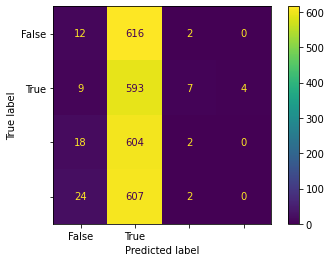

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

#actual = numpy.random.binomial(1,.9,size = 1000)
#predicted = numpy.random.binomial(1,.9,size = 1000)

#confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

cm_display.plot()
plt.show()